# Évaluation automatique de systèmes de traduction


**Nous vous conseillons d'utiliser Google Chrome et Google Colab pour exécuter ce script**

---

## 1. Métriques traditionnelles

Dans la première partie de ce script, nous montrons comment calculer les scores BLEU, TER, ChRF et WER. Ce sont les métriques traditionnelles pour la traduction automatiques (string-based metrics). Ces métriques se basent sur un _exact string matching_ pour calculer la similarité entre la traduction automatique et la traduction de référence.

### 1.1. Installation des librairies
Pour calculer les métriques, nous allons utiliser la librairie [sacreBLEU](https://github.com/mjpost/sacrebleu). La librairie est largement utilisée en traduction automatique grâce à sa reproductibilité. Ses auteurs ont implémenté les métriques BLEU, TER et ChrF.

Nous utiliserons la librairie [huggingface](https://huggingface.co/spaces/evaluate-metric/wer) pour calculer la métrique WER.

Avant d'aller plus loin, assurez vous que vous avez bien créé deux fichier _.txt_ différents (un pour la traduction de référence et un pour la traduction automatique). **Ces fichiers doivent contenir le même nombre de lignes**, chaque ligne correspondant à une phrase.

Exécutez la cellule suivante pour installer les librairies **sacrebleu** et **huggingface**

In [ ]:
!pip install sacrebleu
# for the WER metric
!pip install huggingface evaluate jiwer

### 1.2. Upload des fichiers txt

Nous allons uploader dans le système la traduction de référence et la traduction automatique. Quand vous exécutez la cellule suivante, vous devez voir ceci: 

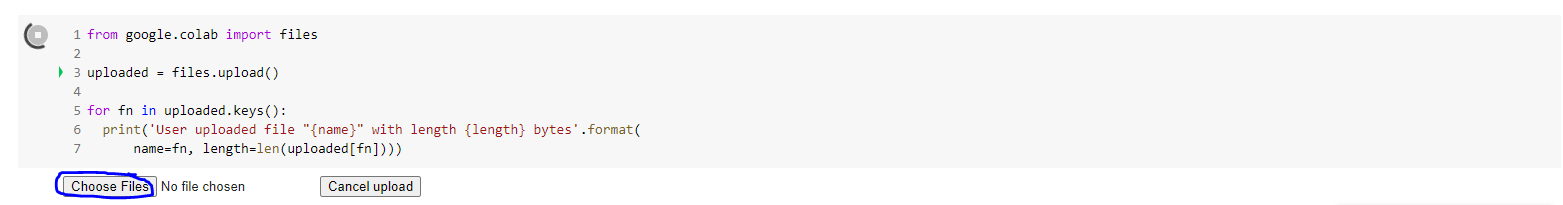

Vous pouvez alors cliquer sur le bouton "Choose files" et chercher les fichiers sur votre ordinateur. Sélectionnez en même temps le fichier contenant la traduction de référence, et celui qui contient la traduction automatique (comme indiqué sur la capture d'écran)

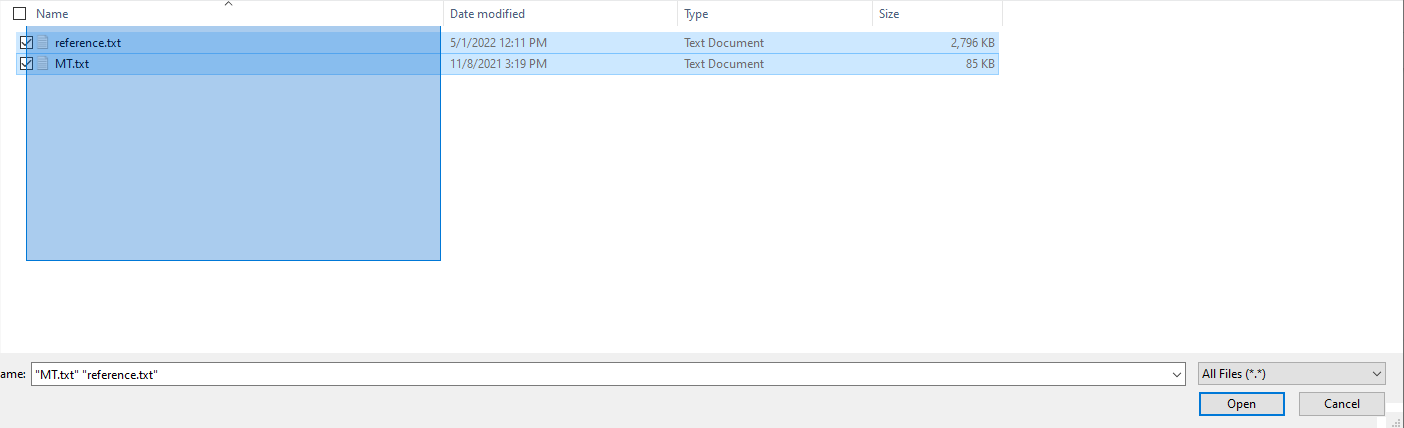

A vous de jouer 🙂



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Dans la cellule suivante, veuillez indiquer le nom du fichier contenant la traduction de référence dans la variable `reference_file_name` et le nom du fichier contenant la traduction automatique dans la variable `mt_file_name`

In [ ]:
reference_file_name = "ukraine_reference.txt"
mt_file_name = "ukraine_huggingface.txt"

reference = open(reference_file_name).readlines()
mt = open(mt_file_name).readlines()

### 1.3 Calcul des métriques

Dans cette section, nous allons calculer les métriques sur les fichiers que vous avez uploadés.


#### 1.3.1 BLEU

La cellule suivante donne le score BLEU pour chaque ligne de la traduction. Prenez en compte la première valeur (BLEU = XX)

In [ ]:
from sacrebleu.metrics import BLEU
bleu = BLEU()

for i, (r, m) in enumerate(zip(reference, mt)):
  print(i + 1, ":", bleu.corpus_score([m], [[r]]))



#### 1.3.2 TER

La cellule suivante donne le score TER pour chaque ligne de la traduction


In [ ]:
from sacrebleu.metrics import TER
ter = TER()

for i, (r, m) in enumerate(zip(reference, mt)):
  print(i + 1, ":", ter.corpus_score([m], [[r]]))

#### 1.3.3 chrF

La cellule suivante donne le score CHRF pour chaque ligne de la traduction


In [ ]:
from sacrebleu.metrics import CHRF
chrf = CHRF()

for i, (r, m) in enumerate(zip(reference, mt)):
  print(i + 1, ":", chrf.corpus_score([m], [[r]]))

#### 1.3.4 WER

La cellule suivante donne le score WER pour chaque ligne de la traduction


In [ ]:
from evaluate import load
metric = load("wer")

for i, (r, m) in enumerate(zip(reference, mt)):
  print(i, ":", metric.compute(predictions=[m], references=[r]))

## 2. Métriques basées sur les embeddings

Dans cette section nous allons calculer les métriques basées sur les _embeddings_. Comme expliqué, les métriques traditionnelles se basent sur l'exact match entre les mots pour calculer des similarités entre une traduction automatique et la traduction de référence.

Les métriques basées sur les embeddings se basent sur les représentations sémantiques pour calculer la similarité. Si ces métriques existent depuis longtemps, les avancées récentes en IA ont largement amélioré les représentations sémantiques des phrases. Ici nous allons utiliser le modèle BERT pour calculer les similarités sémantiques.

### 2.1. Installation des librairies

Nous allons utiliser ici le modèle BERT multilingue, qui supporte environ 100 langues. Dans la cellule suivante, nous allons installer la librairie [huggingface](https://huggingface.co/) qui contient tous les modèles déjà entrainés. Nous allons ensuite installer la librairie qui permet de générer le score basé sur le modèle BERT.

In [ ]:
# Get the most current version of pip 
!pip install --upgrade pip

# Install the transformers library
!pip install transformers

# Install BERTScore
!pip install bert-score

### 2.2. Spécification de la langue

Précisez ici la langue cible de votre traduction. La langue doit faire partie des [langues couvertes par le modèle](https://github.com/google-research/bert/blob/master/multilingual.md#list-of-languages) et être indiquée en [ISO 639-1:2002](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes). Par exemple, si votre traduction est en anglais, vous devrez indiquer "en".

In [ ]:
# the language is set to spanish (iso: es)
language = "fr"

### 2.3. Calcul du score BERT

Pour chaque phrase de la traduction, le modèle vous donne trois scores: la précision, le rappel et la F-mesure. Le score à prendre en compte est la F-mesure

In [ ]:
# Import BERTScore
from bert_score import score

for i, (r, m) in enumerate(zip(reference, mt)):

  P, R, F1 = score([m], [r], lang=language, rescale_with_baseline=True, verbose=True)
  print(i + 1)
  # Print Rbert, Pbert and Fbert
  print(f"\nBERTScore-Recall: {R.mean()}\n")
  print(f"BERTScore-Precision: {P.mean()}\n")
  print(f"BERTScore-F-Measure: {F1.mean()}\n")